# Question 1
Joe Schneider -- Kiran Ferrini

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
import warnings
warnings.filterwarnings('ignore')

### Job Offers
Outside Option: 30k

Three job offers: 70k, 85k, 100k

In [2]:
q_a = (np.ones(9)*(1/3)).reshape(3,3) # transition matrix for part b
q_b = np.array([0.8, 0.2, 0, 0.5, 0.5, 0, 0, 0.7, 0.3]).reshape(3,3) # transion matrix for part a
u = 30 # outside option
X = np.array([70, 85, 100]) # job offers 
beta = 0.9 #discount factor
v0 = np.array([100, 3000, 50]) #starting values (doesn't matter)
max_iter = 500 # maximum iteration failsafe
eps = 1e-6 # stopping condition
strategy = np.array([0,0,0]) #starting strategy (doesn't matter)

In [3]:
def McCall(X, v0, q, beta, u, strategy):
    take = X + beta * v0
    leave = u + beta * (v0 @ q.T)
    strategy_new = (take > leave) * 1
    v1 = v0.copy()
    
    for i in range(len(strategy_new)):
        if strategy_new[i] == False:
            v1[i] = leave[i]
        if strategy_new[i] == True:
            v1[i] = take[i]
    strategy = strategy_new
    
    return(v1, strategy_new)

In [4]:
i = 1
error = float('inf')
while i < max_iter and error > eps:
    v1, strategy = McCall(X, v0, q_a, beta, u, strategy)
    error = np.max(abs(v0 - v1))
    i += 1
    v0 = v1
optimal = []
for job in strategy:
    if strategy[job] == 1:
        optimal.append('Take')
    if strategy[job] == 0:
        optimal.append('Pass')
print('70k: ',optimal[0])
print('85k: ',optimal[1])
print('100k: ', optimal[2])

70k:  Pass
85k:  Take
100k:  Take


## First Case
$$
\begin{bmatrix}
1/3 & 1/3 & 1/3 \\
1/3 & 1/3 & 1/3 \\
1/3 & 1/3 & 1/3 \\
\end{bmatrix}$$


Because the distribution of job offers are independent from the state and all job offers are equally likely at every period, the value of passing up any job is the same:

$$
V_t(70) = 700 \\ 
V_t(85) = 850 \\
V_t(100) = 1000 
$$
$$
\begin{align}
V_p(\cdot) &= 30 + 0.9\,\left[\frac{1}{3} \cdot V_t(70) + \frac{1}{3} \cdot V_t(85) + \frac{1}{3} \cdot V_t(100)\right] \\ 
&= 30 + 0.3 \cdot 700 + 0.3 \cdot 850 + 0.3 \cdot 1000 \\
&= 795
\end{align}
$$

So the value of passing up any job is \\$795k. This value is below the value of taking a \\$85k job (\\$850k) and a \\$100k job (\\$1000k). So we should get an optimal policy of taking any \\$85k or \\$100k job. This matches the solution obtained through recursion.

In [5]:
strategy = np.array([0,0,0])
i = 1
error = float('inf')
while i < max_iter and error > eps:
    v1, strategy = McCall(X, v0, q_b, beta, u, strategy)
    error = np.max(abs(v0 - v1))
    i += 1
    v0 = v1
optimal = []
for job in strategy:
    if strategy[job] == 1:
        optimal.append('Take')
    if strategy[job] == 0:
        optimal.append('Pass')
print('70k: ',optimal[0])
print('85k: ',optimal[1])
print('100k: ', optimal[2])

70k:  Take
85k:  Take
100k:  Take


## Second Case
$$\begin{bmatrix}
0.8 & 0.2 & 0 \\
0.5 & 0.5 & 0 \\
0 & 0.7 & 0.3 \\
\end{bmatrix}$$

85k is also the maximum value so we know it will always be optimal to take it.

This transition matrix implies that if your first offer is not \\$100K, it is impossible to **ever** get that offer again. This means that in reality the only choice to optimize is whether or not it is optimal to take a \\$70k offer or wait for a \\$85k. 

We can again safely predict that it is optimal to take the \\$75k at all times (new highest wage), so the only thing we need to check with the Bellman equation is whether or not passing up a \\$70k offer, in hopes of a \\$75k in the future, is worth it.


$$
v_t(85) = 75 + 0.9 * v_t(85) \Rightarrow 850 \\
v_t(70) = 70 + 0.9 * v_t(70) \Rightarrow 700 \\
$$

$$
v_p(70) = 30 + 0.9 [ 0.8 * v_p(70) + 0.2  * v_t(85) ] \Rightarrow 30 + [0.72 * v_p(70) + 0.18*850] \\
v_p(70) = 183 + 0.72 * v_p(70)\\
v_p(70) = 653.57 
$$

So the value of passing up a \\$70k offer is \\$653.57k which is less than the value of taking that \\$70k offer at \\$700k. So, in this case the optimal policy should be to take any job. The outside option is never worth it.

# Question 2

The goal of this problem is to maximize utility over 3 periods. The problem can be written as:

$$
\begin{array}{c}
\text{choose}~~(c_0,c_1,c_2,k_1,k_2,k_3) \\
\text{to maximize}\\
U(c_0,c_1,c_3) \\
\text{subject to}\\
c_0 + k_1 \le f(k_0) \\
c_1 + k_2 \le f(k_1)\\
c_2 + k_3 \le f(k_2) \\
k_3 \ge 0 \\
k_0~~\text{given}
\end{array}
$$

We will assume now that $U(c_0,c_1, c_2) = u(c_0) + \beta u(c_1) + \beta^2 u(c_2)$

The relevant Lagrangean is:

$$
L(c_0,c_1,k_1,k_2,\lambda_1, \lambda_2,\lambda_3) = u(c_0)+ \beta u(c_1) + \beta^2 u(c_2) - \lambda_1[c_0 + k_1 -f(k_0)] - \lambda_2[c_1 + k_2 -f(k_1)] - \lambda_3[c_2 + k_3 -f(k_2)] - \lambda_4 k_2
$$

The first-order necessary conditions are:

$$
\begin{array}{l c}
\text{w.r.t}~~c_0: & u'(c_0) = \lambda_1 \\
\text{w.r.t}~~c_1: & \beta u'(c_1) = \lambda_2 \\
\text{w.r.t}~~c_2: & \beta u'(c_2) = \lambda_3 \\
\text{w.r.t}~~k_1: & \lambda_1 = \lambda_2 f'(k_1) \\
\text{w.r.t}~~k_2: & \lambda_2 = \lambda_3 f'(k_2) \\
\text{w.r.t}~~k_3: & \lambda_3 = \lambda_4 \\
\text{w.r.t}~~\lambda_1: & c_0 + k_1 - f(k_0) \ge 0\\
\text{w.r.t}~~\lambda_2: & c_1 + k_2 - f(k_1) \ge 0\\
\text{w.r.t}~~\lambda_3: & c_2 + k_3 - f(k_2) \ge 0\\
\text{w.r.t}~~\lambda_4: & k_3\ge 0\\
\end{array}
$$

If the marginal felicity of consumption is always positive, we know that $u'(c_0) > 0$ and $u'(c_1)>0$ and $u'(c_2)>0$.  
Then if the subjective discount factor $\beta \ne 0$, we see that all three of the Lagrange multipliers will be strictly positive.  
Then we can conclude that $k_3 = 0$, and the agent won't leave any capital lying around when she perishes.  
Thus $c_2 = f(k_2)$.  We only need to find values for $c_0$, $c_1$, $k_1$, and $k_2$.  Finding the right values for these four variables is equivalent to answering the question: How much should the agent save in period 0, knowing that she has $f(k_0)$ units of output at hand, and in period 1, knowing that she has $f(k_1)$ units of output at hand, where $k_1$ is derived from the savings decision in period 0?

In [19]:
K0 = 5  #intial capital
alpha = 0.33 # capital's share
A = np.array([6]) # Total factor productivity
def prod(k, A):
    return A*k**alpha
Y1= prod(K0, A)  #GDP at time 1

#preference parameters
rho = 0.9 #elasticity of substitution
beta = 0.9 #discount factor

In [20]:
def f(c, beta, rho):
    """
    This is the utility function for a three-period model
    """
    if rho == 1:
        u = np.log(c[0]) + beta*np.log(c[1]) + beta**2*np.log(c[2])
    else: 
        u =(c[0]**(1-rho)+beta*(c[1]**(1-rho))+beta**2*(c[2]**(1-rho)))/(1-rho)
    return -u

def prod(k, A):
    return A*k**alpha

In [21]:
x0 = [3, 3, 3]
bnds = ((0.5, 200), (0.5, 200), (0.5, 200))

cons0 = ({
    'type': 'ineq',
    'fun' : lambda x, A: np.array([prod(K0, A)-x[0]]),
    'args' : A})
cons1 = ({
    'type': 'ineq',
    'fun' : lambda x, A: np.array([prod(prod(K0, A)-x[0], A) - x[1]]),
    'args' : A
})
cons2 = ({
    'type': 'eq',
    'fun' : lambda x, A: np.array([prod(prod(prod(K0, A)-x[0], A) - x[1], A) - x[2]]),
    'args' : A
})

cons = [cons0, cons1, cons2]
from scipy import optimize as opt
cx = opt.minimize(f, x0, bounds=bnds, constraints=cons, args = (beta, rho))
cx

     fun: -32.97093652276282
     jac: array([-0.16534138, -0.16718769, -0.13232946])
 message: 'Optimization terminated successfully'
    nfev: 55
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([7.38683336, 6.49039945, 7.48609696])

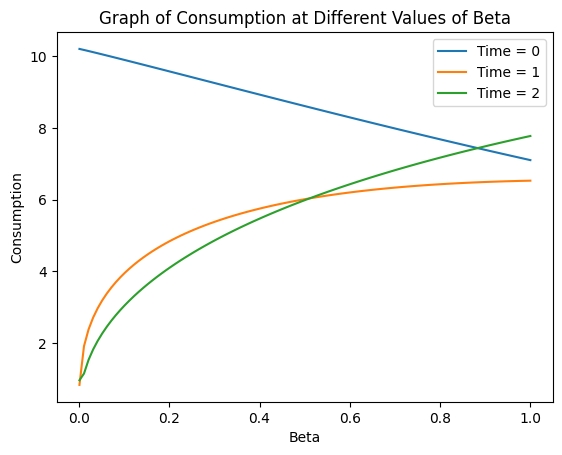

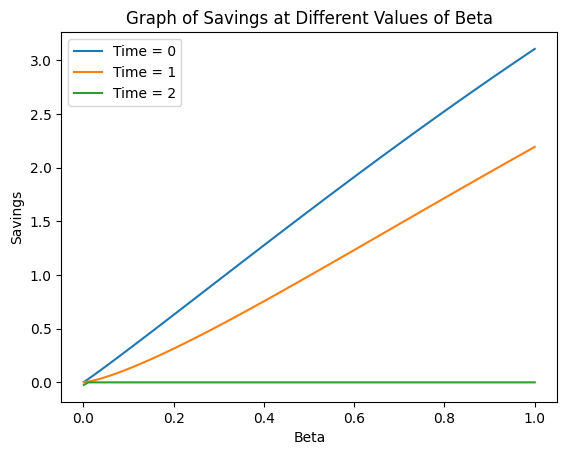

As beta increases and the consumer gets more patient, they start saving more in time periods 0 and 1 but still save nothing in time 2. They save more in period 0 than period 1 at a proportion that increases with beta. It makes sense that there is no savings in period 2 since the consumer would want to use up all their consumption.


In [22]:
beta_test = np.linspace(0.001, 1, 100)
cons_0 = np.zeros(100)
cons_1 = np.zeros(100)
cons_2 = np.zeros(100)

savings_0 = np.zeros(100)
savings_1 = np.zeros(100)
savings_2 = np.zeros(100)

for i in range(len(beta_test)):
    cx = opt.minimize(f, x0, bounds=bnds, constraints=cons, args = (beta_test[i], rho))
    cons_0[i] = cx['x'][0]
    cons_1[i] = cx['x'][1]
    cons_2[i] = cx['x'][2]
    
    savings_0[i] = Y1 - cons_0[i]
    savings_1[i] = (A * savings_0[i] ** alpha) - cons_1[i]
    savings_2[i] = (A * savings_1[i] ** alpha) - cons_2[i]
    
plt.plot(beta_test, cons_0, label = 'Time = 0')
plt.plot(beta_test, cons_1, label = 'Time = 1')
plt.plot(beta_test, cons_2, label = 'Time = 2')
plt.legend()
plt.title('Graph of Consumption at Different Values of Beta')
plt.xlabel('Beta')
plt.ylabel('Consumption')
plt.show()

plt.plot(beta_test, savings_0, label = 'Time = 0')
plt.plot(beta_test, savings_1, label = 'Time = 1')
plt.plot(beta_test, savings_2, label = 'Time = 2')
plt.legend()
plt.title('Graph of Savings at Different Values of Beta')
plt.xlabel('Beta')
plt.ylabel('Savings')
plt.show()

print('As beta increases and the consumer gets more patient, they start saving more in time periods 0 and 1 but still save nothing in time 2. They save more in period 0 than period 1 at a proportion that increases with beta. It makes sense that there is no savings in period 2 since the consumer would want to use up all their consumption.')

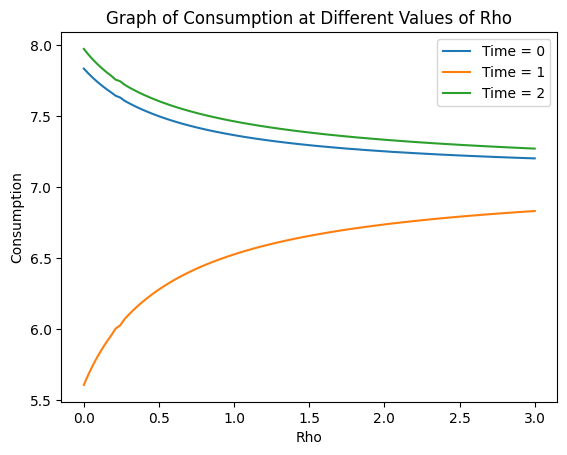

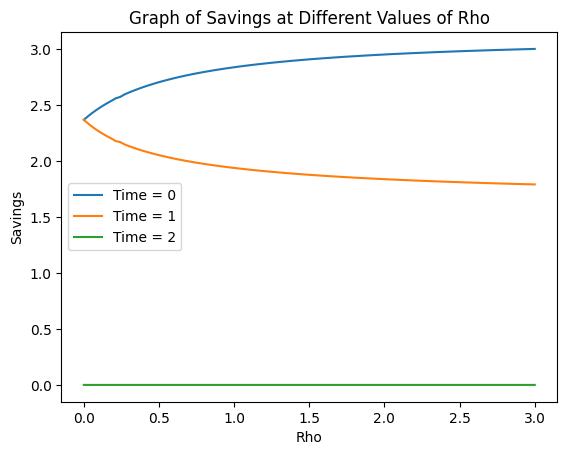

As the agent's savings decision become more responsive to interest rate changes (rho decreases), the agent's savings in periods 0 and 1 get closer and closer. The agent still saves nothing in period 2 because they want to use up all of their consumption.


In [23]:
rho_test = np.linspace(0, 3, 100)
cons_0 = np.zeros(100)
cons_1 = np.zeros(100)
cons_2 = np.zeros(100)

savings_0 = np.zeros(100)
savings_1 = np.zeros(100)
savings_2 = np.zeros(100)

for i in range(len(rho_test)):
    cx = opt.minimize(f, x0, bounds=bnds, constraints=cons, args = (beta, rho_test[i]))
    cons_0[i] = cx['x'][0]
    cons_1[i] = cx['x'][1]
    cons_2[i] = cx['x'][2]
    
    savings_0[i] = Y1 - cons_0[i]
    savings_1[i] = (A * savings_0[i] ** alpha) - cons_1[i]
    savings_2[i] = (A * savings_1[i] ** alpha) - cons_2[i]
    
plt.plot(rho_test, cons_0, label = 'Time = 0')
plt.plot(rho_test, cons_1, label = 'Time = 1')
plt.plot(rho_test, cons_2, label = 'Time = 2')
plt.legend()
plt.title('Graph of Consumption at Different Values of Rho')
plt.xlabel('Rho')
plt.ylabel('Consumption')
plt.show()

plt.plot(rho_test, savings_0, label = 'Time = 0')
plt.plot(rho_test, savings_1, label = 'Time = 1')
plt.plot(rho_test, savings_2, label = 'Time = 2')
plt.legend()
plt.title('Graph of Savings at Different Values of Rho')
plt.xlabel('Rho')
plt.ylabel('Savings')
plt.show()

print('As the agent\'s savings decision become more responsive to interest rate changes (rho decreases), the agent\'s savings in periods 0 and 1 get closer and closer. The agent still saves nothing in period 2 because they want to use up all of their consumption.')

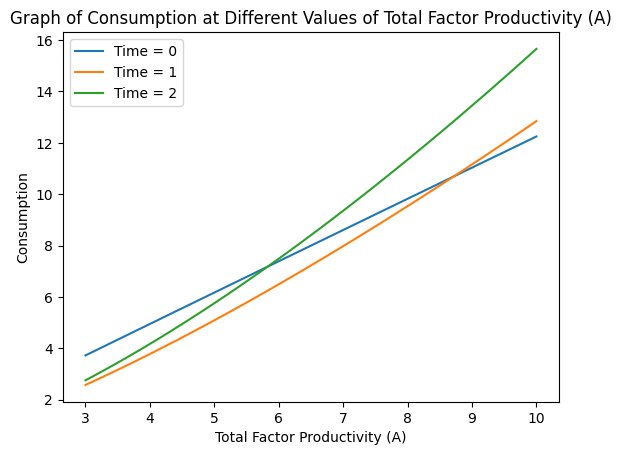

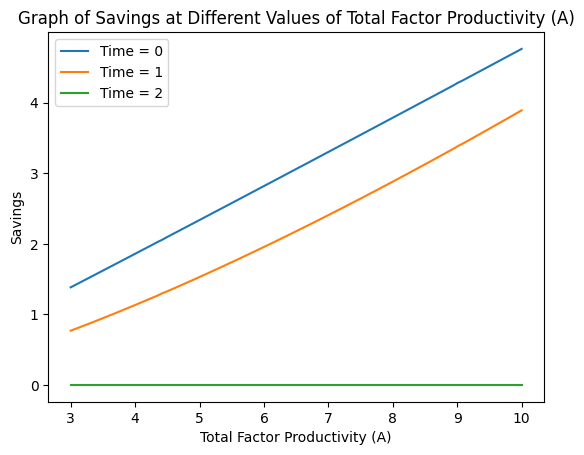

As total factor productivity increases, savings in periods 0 and 1 increase, with savings in period 0 being larger than savings in period 1. There is still no savings in period 2 because the agent wants to use up all of their consumption.


In [24]:
A_test = np.linspace(3, 10, 100)
cons_0 = np.zeros(100)
cons_1 = np.zeros(100)
cons_2 = np.zeros(100)

savings_0 = np.zeros(100)
savings_1 = np.zeros(100)
savings_2 = np.zeros(100)

for i in range(len(A_test)):
    cons0['args'] = np.array([A_test[i]])
    cons1['args'] = np.array([A_test[i]])
    cons2['args'] = np.array([A_test[i]])
    cons = [cons1, cons2]
    cx = opt.minimize(f, x0, bounds=bnds, constraints=cons, args = (beta, rho))
    cons_0[i] = cx['x'][0]
    cons_1[i] = cx['x'][1]
    cons_2[i] = cx['x'][2]
    
    savings_0[i] = (A_test[i] * K0 ** alpha) - cons_0[i]
    savings_1[i] = (A_test[i] * savings_0[i] ** alpha) - cons_1[i]
    savings_2[i] = (A_test[i] * savings_1[i] ** alpha) - cons_2[i]
    
plt.plot(A_test, cons_0, label = 'Time = 0')
plt.plot(A_test, cons_1, label = 'Time = 1')
plt.plot(A_test, cons_2, label = 'Time = 2')
plt.legend()
plt.title('Graph of Consumption at Different Values of Total Factor Productivity (A)')
plt.xlabel('Total Factor Productivity (A)')
plt.ylabel('Consumption')
plt.show()

plt.plot(A_test, savings_0, label = 'Time = 0')
plt.plot(A_test, savings_1, label = 'Time = 1')
plt.plot(A_test, savings_2, label = 'Time = 2')
plt.legend()
plt.title('Graph of Savings at Different Values of Total Factor Productivity (A)')
plt.xlabel('Total Factor Productivity (A)')
plt.ylabel('Savings')
plt.show()

print('As total factor productivity increases, savings in periods 0 and 1 increase, with savings in period 0 being larger than savings in period 1. There is still no savings in period 2 because the agent wants to use up all of their consumption.')